**Investment: Stock Market Prediction**

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.
In this dataset, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). and Cryptocurrency (Bitcoin) historical data.


# Work flow
1. Get data
2. Cleansing & transformation: 
    
    2.1. extract feature

    2.2. one hot

    2.3. train-test split

3. Prediction model
4. Visualize
5. Feature engineer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Get data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/the_data_master/project/portfolio_data.csv")
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [ ]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [ ]:
# Display stock price statistic information
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


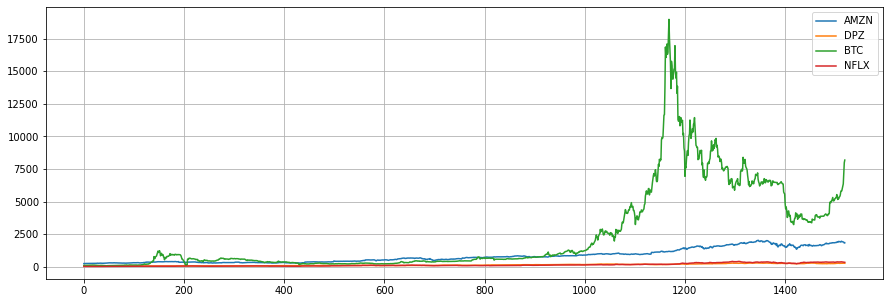

In [ ]:
# A quick look at stock price
df.plot(figsize=(15,5))
plt.grid()
plt.legend();

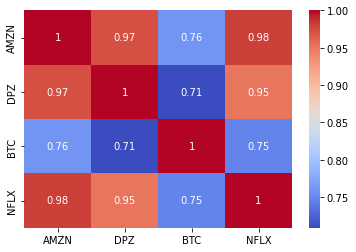

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## 2. Cleansing & transformation

### 2.1. Get feature and target dataframe

In [ ]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [ ]:
import datetime

In [ ]:
df.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

In [ ]:
def get_df(dataframe):
  df=dataframe
  if('Month' in df.columns):
    df=df
  else:
    df['Year'] = [df.iloc[i, 0] for i in range(len(df))]
    df['Month'] = [df.iloc[i, 0] for i in range(len(df))]
    df['Day'] = [df.iloc[i, 0] for i in range(len(df))]
    df['day_name'] = [df.iloc[i, 0] for i in range(len(df))]
    for i in range(len(df)):
      date_obj = datetime.datetime.strptime(df.iloc[i, 0],'%m/%d/%Y')
      df['Day'].iloc[i] = date_obj.strftime('%d')
      df['Month'].iloc[i] = date_obj.strftime('%m')
      df['Year'].iloc[i] = date_obj.year
      df['day_name'].iloc[i] = date_obj.strftime('%A')
    if('AMZN' in df.columns):
      df['past_AMZN'] = df['AMZN'].shift()
    if('DPZ' in df.columns):
      df['past_DPZ'] = df['DPZ'].shift()
    if('BTC' in df.columns):
      df['past_BTC'] = df['BTC'].shift()
    if('NFLX' in df.columns):
      df['past_NFLX'] = df['NFLX'].shift()
    df=df.fillna(0)
    # Set categorical variable
    df = df.astype({'Month':'category', 
                  'Day':'category', 
                  'day_name':'category'}).set_index('Date')
  return df

In [ ]:
len(df)

1520

In [ ]:
df=get_df(df)
df.head()

<ipython-input-206-2d0b6959f244>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].iloc[i] = date_obj.strftime('%d')
<ipython-input-206-2d0b6959f244>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'].iloc[i] = date_obj.strftime('%m')
<ipython-input-206-2d0b6959f244>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'].iloc[i] = date_obj.year
<ipython-input-206-2d0b6959f244>:15: SettingWithCopyWarning: 
A v

,AMZN,DPZ,BTC,NFLX,Year,Month,Day,day_name,past_AMZN,past_DPZ,past_BTC,past_NFLX
Date,,,,,,,,,,,,
5/1/2013,248.229996,51.190983,106.250000,30.415714,2013,05,01,Wednesday,0.000000,0.000000,0.000000,0.000000
5/2/2013,252.550003,51.987320,98.099998,30.641428,2013,05,02,Thursday,248.229996,51.190983,106.250000,30.415714
5/3/2013,258.049988,52.446388,112.900002,30.492857,2013,05,03,Friday,252.550003,51.987320,98.099998,30.641428
5/6/2013,255.720001,53.205257,109.599998,30.098572,2013,05,06,Monday,258.049988,52.446388,112.900002,30.492857
5/7/2013,257.730011,54.151505,113.199997,29.464285,2013,05,07,Tuesday,255.720001,53.205257,109.599998,30.098572


### 2.2. Get one-hot encoder

In [ ]:
# Create one_hot_encoder function
def one_hot_encoder(dataframe):

  # Select category columns
  cat_df = dataframe.select_dtypes(include=['category']).columns.to_list()
  # Convert to one-hot dataframe
  one_hot_df = pd.get_dummies(dataframe, columns=cat_df)
  
  return one_hot_df

In [ ]:
X_dummie = one_hot_encoder(df)
X_dummie

,AMZN,DPZ,BTC,NFLX,Year,past_AMZN,past_DPZ,past_BTC,past_NFLX,Month_01,...,Day_27,Day_28,Day_29,Day_30,Day_31,day_name_Friday,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,
5/1/2013,248.229996,51.190983,106.250000,30.415714,2013,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
5/2/2013,252.550003,51.987320,98.099998,30.641428,2013,248.229996,51.190983,106.250000,30.415714,0,...,0,0,0,0,0,0,0,1,0,0
5/3/2013,258.049988,52.446388,112.900002,30.492857,2013,252.550003,51.987320,98.099998,30.641428,0,...,0,0,0,0,0,1,0,0,0,0
5/6/2013,255.720001,53.205257,109.599998,30.098572,2013,258.049988,52.446388,112.900002,30.492857,0,...,0,0,0,0,0,0,1,0,0,0
5/7/2013,257.730011,54.151505,113.199997,29.464285,2013,255.720001,53.205257,109.599998,30.098572,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/8/2019,1917.770020,283.149994,6171.959961,364.369995,2019,1921.000000,277.390015,5998.709961,370.459991,0,...,0,0,0,0,0,0,0,0,0,1
5/9/2019,1899.869995,282.160004,6358.290039,362.750000,2019,1917.770020,283.149994,6171.959961,364.369995,0,...,0,0,0,0,0,0,0,1,0,0
5/10/2019,1889.979980,278.369995,7191.359863,361.040009,2019,1899.869995,282.160004,6358.290039,362.750000,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Create get_X_y function to get dependent (y) and independent (X) variables
def get_X_y(dataframe,stock):
  
  # Extract time series variable
  X = dataframe.copy()

  # Extract dependent variable
  y = dataframe[[stock]].copy()
  
  return X, y

In [ ]:
# Test get_X_y function
X, y = get_X_y(X_dummie,'AMZN')

# Display 10 rows of X
X.head()

,AMZN,DPZ,BTC,NFLX,Year,past_AMZN,past_DPZ,past_BTC,past_NFLX,Month_01,...,Day_27,Day_28,Day_29,Day_30,Day_31,day_name_Friday,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,
5/1/2013,248.229996,51.190983,106.250000,30.415714,2013,0.000000,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
5/2/2013,252.550003,51.987320,98.099998,30.641428,2013,248.229996,51.190983,106.250000,30.415714,0,...,0,0,0,0,0,0,0,1,0,0
5/3/2013,258.049988,52.446388,112.900002,30.492857,2013,252.550003,51.987320,98.099998,30.641428,0,...,0,0,0,0,0,1,0,0,0,0
5/6/2013,255.720001,53.205257,109.599998,30.098572,2013,258.049988,52.446388,112.900002,30.492857,0,...,0,0,0,0,0,0,1,0,0,0
5/7/2013,257.730011,54.151505,113.199997,29.464285,2013,255.720001,53.205257,109.599998,30.098572,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Create get_X_y function to get dependent (y) and independent (X) variables
def get_X2(dataframe):
  
  X2 = dataframe.loc[:, ~dataframe.columns.str.startswith('PV')]
  X2 = X2.iloc[-1:,:]
  X2.columns = ['PV' + str(col) for col in X2.columns]

  
  return X2

### 2.3. Split train and test dataframe

In [ ]:
# Create stock_train_test_split function
def stock_train_test_split(dataframe, y, trainsize=0.8):

  import math

  train_ratio = trainsize
  train_size = math.ceil(len(dataframe) * train_ratio)

  # Get train dataframe
  X_train = dataframe.iloc[:train_size, :]
  y_train = y.iloc[:train_size, :]

  # Get train dataframe
  X_test = dataframe.copy()
  y_test = y.iloc[train_size:, :]

  # Drop label from independent variable
  col_drop = ['AMZN', 'DPZ', 'BTC', 'NFLX']

  # กรณี X_train มี 'AMZN', 'DPZ', 'BTC', 'NFLX' ทุกตัว
  if all(col in X_train.columns for col in col_drop):
      X_train = X_train.drop(col_drop, axis=1, errors='ignore')
  if all(col in X_test.columns for col in col_drop):
      X_test = X_test.drop(col_drop, axis=1, errors='ignore')
  
  return X_train, X_test, y_train, y_test

In [ ]:
# Test stock_train_tes_split function
trainsize = 0.8
X_train, X_test, y_train, y_test = stock_train_test_split(X_dummie, y, trainsize=trainsize)
X_train = X_train.drop('Year', axis=1)
X_test = X_test.drop('Year', axis=1)

In [ ]:
X_train

,past_AMZN,past_DPZ,past_BTC,past_NFLX,Month_01,Month_02,Month_03,Month_04,Month_05,Month_06,...,Day_27,Day_28,Day_29,Day_30,Day_31,day_name_Friday,day_name_Monday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
Date,,,,,,,,,,,,,,,,,,,,,
5/1/2013,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5/2/2013,248.229996,51.190983,106.250000,30.415714,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5/3/2013,252.550003,51.987320,98.099998,30.641428,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5/6/2013,258.049988,52.446388,112.900002,30.492857,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5/7/2013,255.720001,53.205257,109.599998,30.098572,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/21/2018,1468.349976,219.016006,11256.429690,278.549988,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2/22/2018,1482.920044,227.955032,10481.660160,281.040009,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2/23/2018,1485.339966,224.464478,9847.959961,278.140015,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y_train

,AMZN
Date,
5/1/2013,248.229996
5/2/2013,252.550003
5/3/2013,258.049988
5/6/2013,255.720001
5/7/2013,257.730011
...,...
2/21/2018,1482.920044
2/22/2018,1485.339966
2/23/2018,1500.000000


## 3. Prediction model

### 3.1. Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def model_fit(X_train, y_train):
  # Normalize features
  scaler = StandardScaler()
  # Train model
  model = LinearRegression().fit(X_train, y_train)

  return model

In [ ]:
# Train model with X_train and y_train
model = model_fit(X_train, y_train)

In [ ]:
# Test set prediction
y_hat = model.predict(X_test)

In [ ]:
y_hat[:10]

array([[ 11.64104843],
       [252.55049515],
       [252.51380539],
       [263.06777954],
       [258.37754059],
       [260.86684036],
       [258.67866898],
       [263.00298691],
       [266.94601822],
       [270.64393234]])

In [ ]:
y_train

,AMZN
Date,
5/1/2013,248.229996
5/2/2013,252.550003
5/3/2013,258.049988
5/6/2013,255.720001
5/7/2013,257.730011
...,...
2/21/2018,1482.920044
2/22/2018,1485.339966
2/23/2018,1500.000000


### 3.2. Error

In [ ]:
def rmse(y_test, y_hat):
  # Root mean squared error
  from sklearn.metrics import mean_squared_error
  from math import sqrt

  y_hat_test = y_hat[-len(y_test):]
  rms = sqrt(mean_squared_error(y_test, y_hat_test))
  return rms

In [ ]:
# rms for test dataframe
rmse(y_test, y_hat)

35.698304013348114

## 4. Visualization

In [ ]:
# Create visualize function to display result
def visualize(X, y, y_hat, symbol):

  plt.figure(figsize=(10, 5))
  plt.plot(X.index, y, label='Actual Price')
  plt.plot(X.index, y_hat, label='Predicted Price')

  plt.title('Stock price: {} '.format(symbol) )
  plt.xlabel('Period')
  plt.ylabel('Price [THB]')

  plt.legend()
  plt.show()

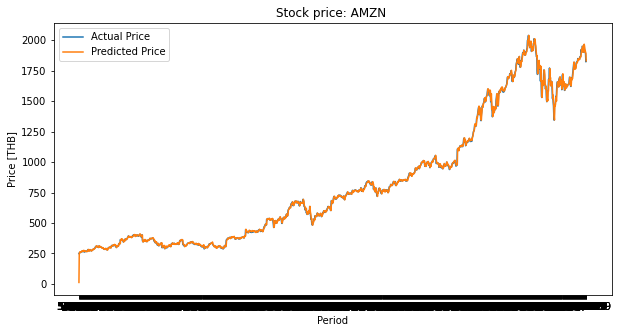

In [ ]:
visualize(X, y, y_hat,'AMZN')

In [ ]:
def subvisualize(X, y, y_hat, symbol):
  y_hatdf = pd.DataFrame(np.array(y_hat),
                  index=y.index, columns=[symbol])
  
  plt.figure(figsize=(10, 5))
  last_20_percent = X.tail(int(len(X)*0.2)).index
  plt.plot(last_20_percent, y.tail(int(len(y)*0.2)), label='Actual Price')
  plt.plot(last_20_percent, y_hatdf.tail(int(len(y_hat)*0.2)), label='Predicted Price')

  plt.title('Stock price: {} '.format(symbol) )
  plt.xlabel('Period')
  plt.ylabel('Price [THB]')
  
  plt.legend()
  plt.show()

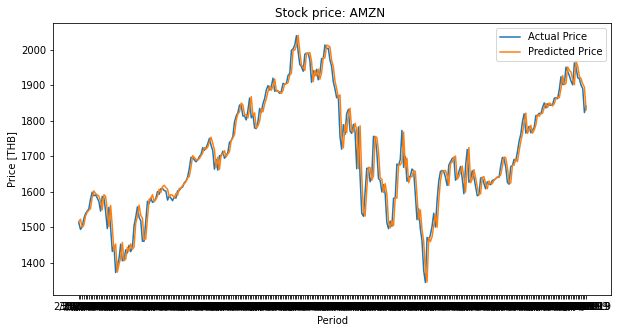

In [ ]:
subvisualize(X, y, y_hat,'AMZN')

## 5. Feature engineer

In [ ]:
df.head()

,AMZN,DPZ,BTC,NFLX,Year,Month,Day,day_name,past_AMZN,past_DPZ,past_BTC,past_NFLX
Date,,,,,,,,,,,,
5/1/2013,248.229996,51.190983,106.250000,30.415714,2013,05,01,Wednesday,0.000000,0.000000,0.000000,0.000000
5/2/2013,252.550003,51.987320,98.099998,30.641428,2013,05,02,Thursday,248.229996,51.190983,106.250000,30.415714
5/3/2013,258.049988,52.446388,112.900002,30.492857,2013,05,03,Friday,252.550003,51.987320,98.099998,30.641428
5/6/2013,255.720001,53.205257,109.599998,30.098572,2013,05,06,Monday,258.049988,52.446388,112.900002,30.492857
5/7/2013,257.730011,54.151505,113.199997,29.464285,2013,05,07,Tuesday,255.720001,53.205257,109.599998,30.098572


In [ ]:
def feature_engineer(dataframe, feat_eng=False):

  if feat_eng:
    dataframe['PVYear'] = dataframe[['Year']].shift(periods=6)
    dataframe['PVMonth'] = dataframe[['Month']].shift(periods=6)
    dataframe['PVDay'] = dataframe[['Day']].shift(periods=6)
    dataframe['PVday_name'] = dataframe[['day_name']].shift(periods=6)
    
    if('AMZN' in dataframe.columns):
      dataframe['PVAMZN'] = dataframe[['AMZN']].shift(periods=6, fill_value=0)
      dataframe['PVpast_AMZN'] = dataframe[['past_AMZN']].shift(periods=6, fill_value=0)
    if('DPZ' in dataframe.columns):
      dataframe['PVDPZ'] = dataframe[['DPZ']].shift(periods=6, fill_value=0)
      dataframe['PVpast_DPZ'] = dataframe[['past_DPZ']].shift(periods=6, fill_value=0)
    if('BTC' in dataframe.columns):
      dataframe['PVBTC'] = dataframe[['BTC']].shift(periods=6, fill_value=0)
      dataframe['PVpast_BTC	'] = dataframe[['past_BTC']].shift(periods=6, fill_value=0)
    if('NFLX' in dataframe.columns):
      dataframe['PVNFLX'] = dataframe[['NFLX']].shift(periods=6, fill_value=0)
      dataframe['PVpast_NFLX'] = dataframe[['past_NFLX']].shift(periods=6, fill_value=0)

    dataframe = dataframe.iloc[10:,1:]
    dataframe['PVYear'] = dataframe['PVYear'].astype('int')
    dataframe['PVMonth'] = dataframe['PVMonth'].astype('int')
    dataframe['PVDay'] = dataframe['PVDay'].astype('int')   

    dataframe['PVday_name'] = dataframe['PVday_name'].astype('category')
    dataframe['PVMonth'] = dataframe['PVMonth'].astype('category')
    dataframe['PVDay'] = dataframe['PVDay'].astype('category')
    return dataframe

In [ ]:
# Test our feature_engineer function
X_engineered = feature_engineer(df, feat_eng=True)
X_engineered

,DPZ,BTC,NFLX,Year,Month,Day,day_name,past_AMZN,past_DPZ,past_BTC,...,PVDay,PVday_name,PVAMZN,PVpast_AMZN,PVDPZ,PVpast_DPZ,PVBTC,PVpast_BTC\t,PVNFLX,PVpast_NFLX
Date,,,,,,,,,,,,,,,,,,,,,
5/15/2013,54.001606,118.209999,34.771427,2013,05,15,Wednesday,268.329987,55.275757,114.220001,...,7,Tuesday,257.730011,255.720001,54.151505,53.205257,113.199997,109.599998,29.464285,30.098572
5/16/2013,53.364532,123.500000,33.861427,2013,05,16,Thursday,266.559998,54.001606,118.209999,...,8,Wednesday,258.679993,257.730011,54.385727,54.151505,112.800003,113.199997,29.801428,29.464285
5/17/2013,53.936020,123.209999,34.142857,2013,05,17,Friday,264.119995,53.364532,123.500000,...,9,Thursday,260.160004,258.679993,54.020340,54.385727,117.699997,112.800003,30.915714,29.801428
5/20/2013,53.139683,122.889999,34.221428,2013,05,20,Monday,269.899994,53.936020,123.209999,...,10,Friday,263.630005,260.160004,54.357620,54.020340,115.639999,117.699997,31.098572,30.915714
5/21/2013,53.355167,123.800003,33.869999,2013,05,21,Tuesday,267.630005,53.139683,122.889999,...,13,Monday,264.510010,263.630005,54.573097,54.357620,111.400002,115.639999,32.768570,31.098572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/8/2019,283.149994,6171.959961,364.369995,2019,05,08,Wednesday,1921.000000,277.390015,5998.709961,...,30,Tuesday,1926.520020,1938.430054,270.579987,268.869995,5389.540039,5350.640137,370.540009,371.829987
5/9/2019,282.160004,6358.290039,362.750000,2019,05,09,Thursday,1917.770020,283.149994,6171.959961,...,1,Wednesday,1911.520020,1926.520020,271.459991,270.579987,5500.720215,5389.540039,378.809998,370.540009
5/10/2019,278.369995,7191.359863,361.040009,2019,05,10,Friday,1899.869995,282.160004,6358.290039,...,2,Thursday,1900.819946,1911.520020,274.320007,271.459991,5753.379883,5500.720215,379.059998,378.809998


In [ ]:
# Create main function to run pipeline
def main(dataframe,stock, feat_eng=True):
  df = dataframe 

  # Get stock
  for i in df.columns:
    if (i != stock):
      df=df.drop(columns=i, axis=1)

  df = df.reindex(columns=['Date',stock])
  df['Date']=df.index
  df = get_df(df)
  # Get engineered features
  X_engineered = feature_engineer(df, feat_eng=feat_eng)
  X_engineered[stock]=df[stock]
  # One-hot encoder
  X_eng_dummie = one_hot_encoder(X_engineered)
  
  X, y = get_X_y(X_eng_dummie,stock)
  # Train test splitting
  X_train, X_test, y_train, y_test = stock_train_test_split(X, 
                                                            y, 
                                                            trainsize=0.8)
  X_train = X_train.loc[:, X_train.columns.str.startswith('PV')]
  X_test = X_test.loc[:, X_test.columns.str.startswith('PV')]
  
  # Prediction model
  X_train.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'
                            , 'PVDay_7': 'PVDay_07', 'PVDay_8': 'PVDay_08', 'PVDay_9': 'PVDay_09',
                          'PVMonth_1': 'PVMonth_01', 'PVMonth_2': 'PVMonth_02', 'PVMonth_3': 'PVMonth_03', 'PVMonth_4': 'PVMonth_04', 'PVMonth_5': 'PVMonth_05', 'PVMonth_6': 'PVMonth_06'
                            , 'PVMonth_7': 'PVMonth_07', 'PVMonth_8': 'PVMonth_08', 'PVMonth_9': 'PVMonth_09'}, inplace=True)
  X_test.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'
                            , 'PVDay_7': 'PVDay_07', 'PVDay_8': 'PVDay_08', 'PVDay_9': 'PVDay_09',
                         'PVMonth_1': 'PVMonth_01', 'PVMonth_2': 'PVMonth_02', 'PVMonth_3': 'PVMonth_03', 'PVMonth_4': 'PVMonth_04', 'PVMonth_5': 'PVMonth_05', 'PVMonth_6': 'PVMonth_06'
                            , 'PVMonth_7': 'PVMonth_07', 'PVMonth_8': 'PVMonth_08', 'PVMonth_9': 'PVMonth_09'}, inplace=True)
  y_train.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'
                            , 'PVDay_7': 'PVDay_07', 'PVDay_8': 'PVDay_08', 'PVDay_9': 'PVDay_09',
                          'PVMonth_1': 'PVMonth_01', 'PVMonth_2': 'PVMonth_02', 'PVMonth_3': 'PVMonth_03', 'PVMonth_4': 'PVMonth_04', 'PVMonth_5': 'PVMonth_05', 'PVMonth_6': 'PVMonth_06'
                            , 'PVMonth_7': 'PVMonth_07', 'PVMonth_8': 'PVMonth_08', 'PVMonth_9': 'PVMonth_09'}, inplace=True)
  y_test.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'
                            , 'PVDay_7': 'PVDay_07', 'PVDay_8': 'PVDay_08', 'PVDay_9': 'PVDay_09',
                          'PVMonth_1': 'PVMonth_01', 'PVMonth_2': 'PVMonth_02', 'PVMonth_3': 'PVMonth_03', 'PVMonth_4': 'PVMonth_04', 'PVMonth_5': 'PVMonth_05', 'PVMonth_6': 'PVMonth_06'
                            , 'PVMonth_7': 'PVMonth_07', 'PVMonth_8': 'PVMonth_08', 'PVMonth_9': 'PVMonth_09'}, inplace=True)
  X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
  y_test = y_test.reindex(columns=y_train.columns, fill_value=0)
  model = model_fit(X_train, y_train)

  # Prediction
  y_hat = model.predict(X_test)
 
  # RMS
  RMS = rmse(y_test, y_hat)
  X2 = get_X2(X_eng_dummie)
  X2 = X2.reindex(columns=X_train.columns, fill_value=0)
  y_pred = model.predict(X2)
  
  print(RMS)
  print(y_pred)

  return RMS, y_pred

In [ ]:
# Set all parameters
stock_symbol = 'AMZN'
feat_eng = True

RMS, y_pred = main(df,stock_symbol, feat_eng=feat_eng)
print(RMS)
print(y_pred)

<ipython-input-206-2d0b6959f244>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].iloc[i] = date_obj.strftime('%d')
<ipython-input-206-2d0b6959f244>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'].iloc[i] = date_obj.strftime('%m')
<ipython-input-206-2d0b6959f244>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'].iloc[i] = date_obj.year
<ipython-input-206-2d0b6959f244>:15: SettingWithCopyWarning: 
A v

83.85605283047826
[[1866.41684723]]
83.85605283047826
[[1866.41684723]]


<ipython-input-232-0c132c8570e1>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'
<ipython-input-232-0c132c8570e1>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'


In [ ]:
print(RMS)
print(y_pred)

83.85605283047826
[[1866.41684723]]


In [ ]:
# Set all parameters
stock_symbol = 'AMZN'
feat_eng = True
datasearch = df[stock_symbol]
RMS, y_pred = main(df,stock_symbol, feat_eng=feat_eng)
StockSearch = pd.DataFrame({'Stock': [stock_symbol], 'Price': [datasearch.iloc[-1]], 'PricePredict': [y_pred], 'RMS': [RMS]})
StockSearch

<ipython-input-206-2d0b6959f244>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].iloc[i] = date_obj.strftime('%d')
<ipython-input-206-2d0b6959f244>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'].iloc[i] = date_obj.strftime('%m')
<ipython-input-206-2d0b6959f244>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'].iloc[i] = date_obj.year
<ipython-input-206-2d0b6959f244>:15: SettingWithCopyWarning: 
A v

83.85605283047826
[[1866.41684723]]


<ipython-input-232-0c132c8570e1>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'
<ipython-input-232-0c132c8570e1>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'


,Stock,Price,PricePredict,RMS
0,AMZN,1840.119995,[[1866.416847229004]],83.856053


In [ ]:
stock_symbollist = ['DPZ','BTC','NFLX']

for stock_symbol in stock_symbollist:
  feat_eng = True
  datasearch = df[stock_symbol]
  RMS, y_pred = main(df,stock_symbol, feat_eng=feat_eng)
  StockSearch

<ipython-input-206-2d0b6959f244>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].iloc[i] = date_obj.strftime('%d')
<ipython-input-206-2d0b6959f244>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'].iloc[i] = date_obj.strftime('%m')
<ipython-input-206-2d0b6959f244>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'].iloc[i] = date_obj.year
<ipython-input-206-2d0b6959f244>:15: SettingWithCopyWarning: 
A v

11.586739262625086
[[274.42466354]]


<ipython-input-206-2d0b6959f244>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].iloc[i] = date_obj.strftime('%d')
<ipython-input-206-2d0b6959f244>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'].iloc[i] = date_obj.strftime('%m')
<ipython-input-206-2d0b6959f244>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'].iloc[i] = date_obj.year
<ipython-input-206-2d0b6959f244>:15: SettingWithCopyWarning: 
A v

801.500708619553
[[10120.46026611]]


<ipython-input-206-2d0b6959f244>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].iloc[i] = date_obj.strftime('%d')
<ipython-input-206-2d0b6959f244>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'].iloc[i] = date_obj.strftime('%m')
<ipython-input-206-2d0b6959f244>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'].iloc[i] = date_obj.year
<ipython-input-206-2d0b6959f244>:15: SettingWithCopyWarning: 
A v

22.374879302697114
[[350.35202026]]


<ipython-input-232-0c132c8570e1>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'
<ipython-input-232-0c132c8570e1>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.rename(columns={'PVDay_1': 'PVDay_01', 'PVDay_2': 'PVDay_02', 'PVDay_3': 'PVDay_03', 'PVDay_4': 'PVDay_04', 'PVDay_5': 'PVDay_05', 'PVDay_6': 'PVDay_06'


In [ ]:
StockSearch

,Stock,Price,PricePredict,RMS
0,AMZN,1840.119995,[[1866.416847229004]],83.856053


In [ ]:
StockSearch['diff'] = (StockSearch['PricePredict'].astype(float))-(StockSearch['Price'].astype(float))
StockSearch['%Change'] = StockSearch['diff']/StockSearch['Price']
StockConclusion = StockSearch.sort_values(by='%Change', ascending = False)
StockConclusion

,Stock,Price,PricePredict,RMS,diff,%Change
0,AMZN,1840.119995,[[1866.416847229004]],83.856053,26.296852,0.014291


## Extra

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/the_data_master/project/portfolio_data.csv")
# Choose the stock/cryptocurrency you want to predict
df = df[['Date', 'AMZN']]
df = df.set_index('Date')

In [ ]:
# Convert dataframe to numpy array
data = df.values

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# Define the lookback window
lookback = 5

In [ ]:
# Create function to generate training and testing data
def create_dataset(dataset, lookback):
    X, Y = [], []
    for i in range(len(dataset)-lookback-1):
        a = dataset[i:(i+lookback), 0]
        X.append(a)
        Y.append(dataset[i + lookback, 0])
    return np.array(X), np.array(Y)

# Generate the training and testing data
train_X, train_Y = create_dataset(train_data, lookback)
test_X, test_Y = create_dataset(test_data, lookback)

# Reshape the input data to be 3-dimensional
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(train_X, train_Y, epochs=50, batch_size=32)


Epoch 1/50
38/38 [==============================] - 6s 10ms/step - loss: 0.0201
Epoch 2/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 8.2128e-04
Epoch 4/50
38/38 [==============================] - 0s 9ms/step - loss: 7.6506e-04
Epoch 5/50
38/38 [==============================] - 0s 9ms/step - loss: 7.1809e-04
Epoch 6/50
38/38 [==============================] - 0s 10ms/step - loss: 6.4595e-04
Epoch 7/50
38/38 [==============================] - 0s 8ms/step - loss: 6.1030e-04
Epoch 8/50
38/38 [==============================] - 0s 9ms/step - loss: 6.7037e-04
Epoch 9/50
38/38 [==============================] - 0s 9ms/step - loss: 6.4145e-04
Epoch 10/50
38/38 [==============================] - 0s 9ms/step - loss: 5.6732e-04
Epoch 11/50
38/38 [==============================] - 0s 9ms/step - loss: 5.6380e-04
Epoch 12/50
38/38 [==============================] - 0s 9ms/step - loss: 6.6091e-04
Epoch 1

In [ ]:
# Get the predicted values
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Invert the scaling
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform([train_Y])
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform([test_Y])

# Calculate the root mean squared error (RMSE)
train_RMSE = np.sqrt(np.mean(np.power((train_Y - train_predict),2)))
test_RMSE = np.sqrt(np.mean(np.power((test_Y - test_predict),2)))
print('Train RMSE:', train_RMSE)
print('Test RMSE:', test_RMSE)


10/10 [==============================] - 0s 4ms/step
Train RMSE: 412.02595874812846
Test RMSE: 216.90529678800294


In [ ]:
print('RMSE:', test_RMSE)

RMSE: 216.90529678800294


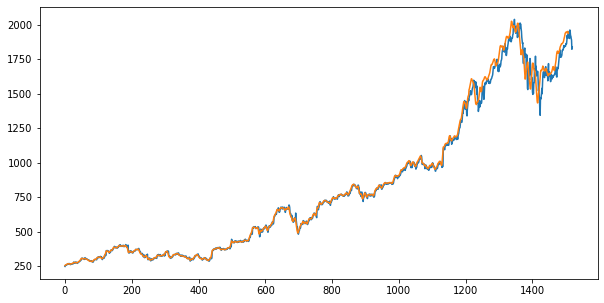

In [ ]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(data))
plt.plot(np.concatenate((train_predict, test_predict)))
plt.show()

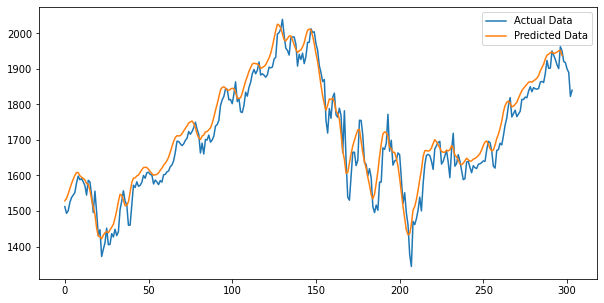

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(test_data), label='Actual Data')
plt.plot(test_predict, label='Predicted Data')

plt.legend()
plt.show()